In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import time
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
#from keras.backend import manual_variable_initialization manual_variable_initialization(True)

In [32]:
img=cv2.imread("img/Letters/A/1.jpg")
h,w,c=img.shape
del img
data_dir=pathlib.Path("img/Letters")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
batch_size = 32
img_height = h
img_width = w
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

62400
Found 62400 files belonging to 26 classes.
Using 49920 files for training.
Found 62400 files belonging to 26 classes.
Using 12480 files for validation.
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
26


In [28]:
plt.figure(figsize=(10, 10))
'''for images, labels in train_ds.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    #cv2.imshow(images[i].numpy().astype("uint8"))
    cv2.imshow("Image",images[i].numpy())
    cv2.waitKey(0)
    #plt.title(class_names[labels[i]])
    #plt.axis("off")'''

'for images, labels in train_ds.take(1):\n  for i in range(2):\n    ax = plt.subplot(3, 3, i + 1)\n    #cv2.imshow(images[i].numpy().astype("uint8"))\n    cv2.imshow("Image",images[i].numpy())\n    cv2.waitKey(0)\n    #plt.title(class_names[labels[i]])\n    #plt.axis("off")'

<Figure size 720x720 with 0 Axes>

In [33]:
AUTOTUNE = tf.data.AUTOTUNE

In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
num_classes = 44

0.0 1.0


In [35]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(50,50, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [38]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1560/1560 [==============================] - 47s 27ms/step - loss: 0.0893 - accuracy: 0.9751 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 2/10
1560/1560 [==============================] - 38s 24ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 1.3474e-04 - val_accuracy: 0.9999
Epoch 3/10
1560/1560 [==============================] - 37s 24ms/step - loss: 9.4392e-05 - accuracy: 1.0000 - val_loss: 1.0064e-05 - val_accuracy: 1.0000
Epoch 4/10
1560/1560 [==============================] - 40s 26ms/step - loss: 2.6437e-06 - accuracy: 1.0000 - val_loss: 5.2985e-06 - val_accuracy: 1.0000
Epoch 5/10
1560/1560 [==============================] - 42s 27ms/step - loss: 1.0642e-06 - accuracy: 1.0000 - val_loss: 3.1364e-06 - val_accuracy: 1.0000
Epoch 6/10
1560/1560 [==============================] - 42s 27ms/step - loss: 4.0820e-07 - accuracy: 1.0000 - val_loss: 1.9645e-06 - val_accuracy: 1.0000
Epoch 7/10
1560/1560 [==============================] - 40s 25ms/step - loss: 1.8030e-07

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [41]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

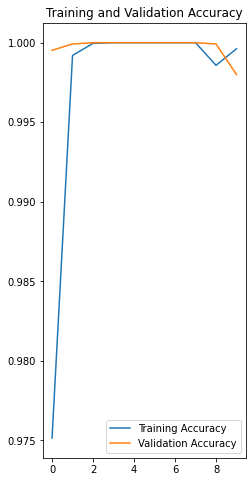

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

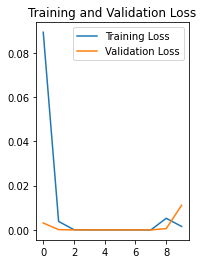

In [43]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    "1.jpg", target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to F with a 100.00 percent confidence.


In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [46]:
checkpoint_path = "training_letters/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [47]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[cp_callback]
)

Epoch 1/10
1560/1560 [==============================] - 37s 24ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 4.8111e-04 - val_accuracy: 0.9999

Epoch 00001: saving model to training_letters\cp.ckpt
Epoch 2/10
1560/1560 [==============================] - 38s 24ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 1.7683e-05 - val_accuracy: 1.0000

Epoch 00002: saving model to training_letters\cp.ckpt
Epoch 3/10
1560/1560 [==============================] - 40s 25ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0052 - val_accuracy: 0.9983

Epoch 00003: saving model to training_letters\cp.ckpt
Epoch 4/10
1560/1560 [==============================] - 40s 26ms/step - loss: 1.7385e-05 - accuracy: 1.0000 - val_loss: 1.9629e-06 - val_accuracy: 1.0000

Epoch 00004: saving model to training_letters\cp.ckpt
Epoch 5/10
1560/1560 [==============================] - 38s 24ms/step - loss: 6.2196e-07 - accuracy: 1.0000 - val_loss: 2.7759e-06 - val_accuracy: 1.0000

Epoch 00005: saving model

In [48]:
#!mkdir -p saved_model
model.save('saved_model/letters_model')


INFO:tensorflow:Assets written to: saved_model/letters_model\assets


In [49]:
img = keras.preprocessing.image.load_img(
    "1.jpg", target_size=(50,50)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
cl=predictions.argmax(axis=-1)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(cl, 100 * np.max(score))
)

This image most likely belongs to [5] with a 100.00 percent confidence.


In [7]:
new_model = tf.keras.models.load_model('saved_model/numbers_model')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [21]:
new_model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(50,50, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(44)
])

In [22]:
new_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
loss, acc = new_model.evaluate(val_ds, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

390/390 - 2s - loss: 3.8055 - accuracy: 0.0151
Untrained model, accuracy:  1.51%


In [11]:
checkpoint_path = "training_1/cp.ckpt"
new_model.load_weights(checkpoint_path)
loss, acc = new_model.evaluate(val_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

660/660 - 6s - loss: 12.1134 - accuracy: 0.1264
Restored model, accuracy: 12.64%


In [25]:
new_model.save('saved_model/new_model')
model.save('saved_model/model2')

INFO:tensorflow:Assets written to: saved_model/new_model\assets
INFO:tensorflow:Assets written to: saved_model/model2\assets


In [43]:
test_model=keras.models.load_model('saved_model/numbers_model')

In [44]:
loss, acc = test_model.evaluate(val_ds, verbose=2)
print("Test model, accuracy: {:5.2f}%".format(100 * acc))

135/135 - 1s - loss: 6.5639e-07 - accuracy: 1.0000
Test model, accuracy: 100.00%


In [53]:
tf.keras.backend.clear_session()